[*********************100%***********************]  1 of 1 completed

1 Failed download:
['LEN']: YFPricesMissingError('possibly delisted; no price data found  (1d 2025-01-01 -> 2025-02-27)')


Empty DataFrame
Columns: [(Adj Close, LEN), (Close, LEN), (High, LEN), (Low, LEN), (Open, LEN), (Volume, LEN)]
Index: []


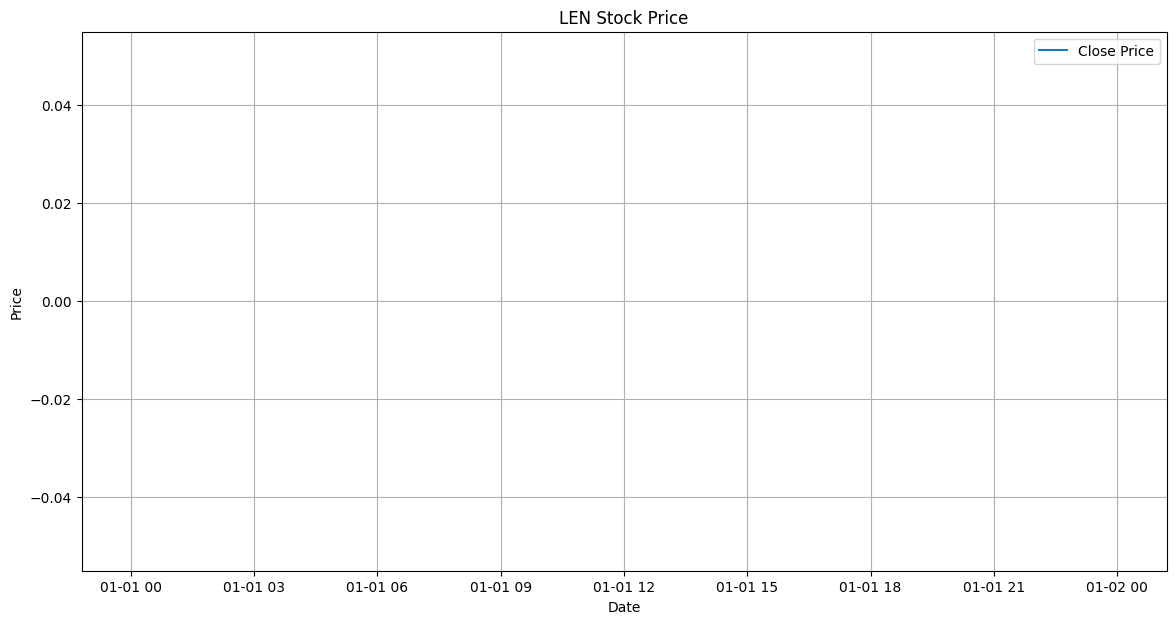

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt

# Загрузка данных о компании LEN
ticker = 'LEN'
data = yf.download(ticker, start='2025-01-01')

# Вывод данных
print(data)

# Визуализация данных
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price')
plt.title(f'{ticker} Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
import yfinance as yf
from typing import List
from config import sp500_tickers

def get_signals(tickers: List[str]) -> List[str]:
    """Получение торговых сигналов - топ-10 акций по моментуму"""
    data = yf.download(tickers, period="1y", timeout=30)
    if 'Close' not in data.columns:
        raise KeyError("Столбец 'Close' отсутствует в данных")
    momentum_returns = (
        data['Close']
        .dropna(axis=1)
        .pct_change(periods=len(data)-1)
        .iloc[-1]
        .nlargest(10)
    )
    return momentum_returns.index.tolist()

# Список тикеров для тестирования
tickers = ["AAPL", "MSFT", "GOOGL", "AMZN", "FB", "TSLA", "NVDA", "JNJ", "V", "PG"]

# Получаем торговые сигналы
signals = get_signals(sp500_tickers)

# Выводим результаты
print("Торговые сигналы:", signals)

[*********************100%***********************]  500 of 500 completed

1 Failed download:
['LEN']: YFPricesMissingError('possibly delisted; no price data found  (period=1y)')


Торговые сигналы: ['PLTR', 'VST', 'TPL', 'UAL', 'TRGP', 'HWM', 'NRG', 'FOX', 'MMM', 'RCL']
